In [12]:
#Imported libraries
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
class TargetNumberGame:
    def __init__(self, N):
        self.numbers = [75, 3, 1, 4, 50, 6, 12, 8]
        #Population matrix:
        #Rows are number of individuals in population, columns are operations encoded between numbers:
        self.population= np.random.randint(4,size=(N,7))

    def fitness(self, numbers, population, totalindividuals, target): 
        """
        Real encoding of operations:
        ############################
        
        + --> 0, 
        * --> 1, 
        - --> 2.
        / --> 3.

        **Note:Redundancy could improve the algorithm's rate of convergence (empricially proven in literature).
        
        Variables:
        numbers                    Number list
                        
        population                 Matrix that will store individuals
            
        totalindividuals          total number of individuals , N parents + children = len(population)
        """
        fitness = []

        #For total number of individuals (N+ children)
        for i in range(0, totalindividuals):
            #valor total de la operación es 'total'
            total = numbers[0]
            for j in range(0, 7):
                if population[i][j] == 0:
                    total += numbers[j+1]
                elif population[i][j] == 1:
                    total -= numbers[j+1]
                elif population[i][j] == 2:
                    total *= numbers[j+1]
                elif population[i][j] == 3:
                    total /= numbers[j+1]

            #print("total final: ",total)
            fitness.append(abs(target -total))
        return fitness
            

    def mutation(self, population, totalindividuals, N, p_mutation, genes_m):
        """
        Real encoding mutation operator
        ###############################

        Arguments:
            N                       Initial size of population, the higher the value, the higher the diversity of population
            
            p_mutation               Probability of mutation, ideally it would increase throughout iterations to prevent falling to local minima.
            
            genes_m                  Número de genes a mutar, entre 1 <= puntos <= 7(número de operadores)
        """   
        for p in range(0,genes_m):
            for i in range(N,totalindividuals):
                if 	np.random.uniform() > (1-p_mutation):
                        population[i][random.randint(0,6)] = random.randint(0,3)                 
        return population

    def probCrossover(self, population, fitness, n_parents):
    
        """
        Probabilistic crossover and selection of parents.
        #################################################
        
        Arguments:
        
            fitVec         Vector with fitness values of the individuals in the matrix [1xNumind]
            n_parents      Number of pairs to be crossed
        """
        
        fitness = np.array(fitness, 'double')
        probVec = fitness
        order = []

        for i in range(0,len(fitness)):
            probVec[i] = (1/(fitness[i]+0.00001))  #0.0001 so it doesn't interfere and allows calculation in case of fitness=0.
            
        probVec = probVec/(sum(probVec)) #normalization

        for k in range(0,2*n_parents):
            randomness = []
            for h in range(0,len(fitness)):
                randomness.append(np.random.uniform()) #random value between 0 and 1.
            order.append(np.argmax(randomness*probVec))#higher fitness inviduals are crossed-over with higher probability

        i = 0
        for j in range(0,n_parents):                        
            crosspoint = random.randint(1,8)	    #Returns number between 1 and 8 -> cross-over point
            temp1 = np.append(population[order[i]][:crosspoint],population[order[i+1]][crosspoint:]) #first descendant
            temp2 = np.append(population[order[i+1]][:crosspoint],population[order[i]][crosspoint:]) #second descendant
            population = np.vstack([population,temp1])
            population = np.vstack([population,temp2])
            i+=2
        #Returns matrix with children
        return population

    def replace(self, population, fitness, N):

        """
        Elitist replacement method (derteministic)
        ##########################################
        
        Keeps N individuals with highest fitness, sorts the new matrix
        by ascending fitness values

        """
        sortvec = np.argsort(fitness) #ordena por fitness
        tempmatrix = np.empty((0,7), int)
        population = np.matrix(population) #transforma de np.array a np.matrix
        
        for i in range(0, N):
            tempmatrix = np.append(tempmatrix, population[sortvec[i]][:], axis=0)
            #me quedo con 
        tempmatrix = np.array(tempmatrix)

        return tempmatrix


    def probReplace(self, population, fitness, N):

        """
        Probabilistic Replacement:
        ##########################################
        
        Individuals with better fitness value, will be kept in population with higher probability.
        
        """
        fitness = np.array(fitness, 'double')
        probVec = fitness
        order = []

        for i in range(0,len(fitness)):
            probVec[i] = fitness[i]/sum(fitness)
        

        for k in range(0,N):
            randomness = []
            for h in range(0,len(fitness)):
                randomness.append(np.random.uniform())
            order.append(np.argmax(randomness*probVec))

        print (order)
        tempmatrix = np.empty((0,7), int)
        population = np.matrix(population)
        
        for i in range(0, N):
            tempmatrix = np.append(tempmatrix, population[sortvec[i]][:], axis=0)

        tempmatrix = np.array(tempmatrix)

        return tempmatrix


Average number of iterations per simulation: 6.9
Minimum fitness value:  4
Number of solutions found:  1
Solution 0 :  [2 1 2 1 0 1 0]


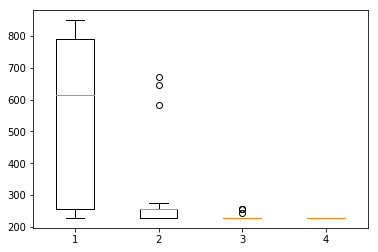

In [30]:
import matplotlib.pyplot as plt

#Initial size of population
N = 20

#Number of pairs to be crossed-over (2*n_parents, children will be obtained):
n_parents = 5

#Max.iterations till convergence:
iterations = 200

#Number of simulations to run:
n_simulations = 20

#Target value
target=852

#Mutation parameters:
p_mutation = .30
points = 1

Fittest,Fittest_pop, Best, New_population= [],[],[],[]
iteration_counter = 0.
minimum_fitness = 1000000

#For each simulation:
for v in range(0,n_simulations):

    itCounter = 0
    game = TargetNumberGame(N)
    fitnessevol=[]
    iterator=[]
    for i in range(0,iterations):
        
        #Probabilistic Crossover
        fit = game.fitness(game.numbers, game.population, N,target)
        crossedMat = game.probCrossover(game.population, fit, n_parents)
        
        #Mutation
        fit2 = game.fitness(game.numbers, crossedMat, len(crossedMat),target)
        mutatedMat = game.mutation(crossedMat, len(crossedMat), N, p_mutation, points)
        
        #Probabilistic Replacement
        fit3 = game.fitness(game.numbers, mutatedMat, len(mutatedMat),target)
        replacedMat = game.replace(mutatedMat, fit3, N)
        
        #New population
        fit4 = game.fitness(game.numbers, replacedMat, len(replacedMat),target)
        game.population = replacedMat
        
        fitnessevol.append(fit4)
        c=np.array(fitnessevol).shape
        itCounter +=1
        
        #Convergence (if 0.97 of genes converge)
        if float(fit4.count(fit4[np.argmin(fit4)]))/len(fit4) >= 0.97:
            break

    #Minimum fitness in this iteration:
    min_fitness_iteration = fit4[np.argmin(fit4)]
    Fittest.append(min_fitness_iteration)
    Fittest_pop.append(replacedMat[np.argmin(fit4)])
    
    #Updates minimum fitness value if it decreases
    if(min_fitness_iteration<minimum_fitness):
        minimum_fitness = min_fitness_iteration
        New_population = replacedMat[np.argmin(fit4)]
    iteration_counter += itCounter

plt.boxplot(fitnessevol)

print('Average number of iterations per simulation:',iteration_counter/n_simulations)
print("Minimum fitness value: ",minimum_fitness)

for i in range(0,len(Fittest)):
    if(minimum_fitness==Fittest[i]):
        Best.append(Fittest_pop[i])

print("Number of solutions found: ",len(Best))
for i in range(0,len(Best)):
    print("Solution",i,": ",Best[i])


(4, 20)


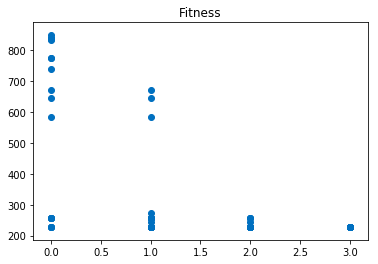

In [32]:
c=np.array(fitnessevol).shape

print(c)

import matplotlib.pyplot as plt

for j in range(c[1]):
    unovec=[fitnessevol[i][j] for i in range(0,c[0])]
    plt.scatter(range(c[0]),unovec,color=(0,112/255,192/255))

plt.title("Fitness")
plt.show()